##Memanggil library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import string
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Menghubungkan ke Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Memeriksa Directory
!ls drive/'My Drive'/'Kelompok 4 Proyek 2'/'Data'
#!ls drive/'Shared with me'/'Kelompok 4 Proyek 2'/'Data'

'Data Twitter API'  'Final Data.csv'   FinalSafa.csv   Mentah


##Mengimport data dari file di Google Drive

In [ ]:
Data = pd.read_csv('drive/My Drive/Kelompok 4 Proyek 2/Data/Final Data.csv')
#Data = pd.read_csv('Final Data.csv') #drag csv ke bagian files

In [ ]:
Data

,Unnamed: 0,Label,Text
0,0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
1288,1288,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
1289,1289,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
1290,1290,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
1291,1291,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [ ]:
#Menghapus kolom Unamed: 0 karena tidak diperlukan
Data = Data.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Kolom 'Unnamed: 0' telah terhapus
Data

,Label,Text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
1288,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
1289,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
1290,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
1291,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."




##Mengkonversi kata negative dan positive



In [ ]:
#negative = 0
#positive = 1

def convert(row):  
    if row['Label']=='positive':
        return 1
    elif row['Label']=='negative':
        return 0
    else:
        return 'other'
    
Data['Label'] = Data.apply(lambda row: convert(row), axis=1)

In [ ]:
Data

,Label,Text
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
1288,1,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
1289,1,Alhamdulillah lancar pakai <PROVIDER_NAME>
1290,1,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
1291,1,"di tempat ramai seperti di lokasi wisata, <PRO..."


##Memeriksa keunikan data

In [ ]:
Data.nunique()

Label       2
Text     1293
dtype: int64

##Melakukan split data ke data train dan data test

In [ ]:
train, test = train_test_split(Data, test_size=0.3, random_state=1)


In [ ]:
train

,Label,Text
875,0,"Film itu kalau byk di sensor, rasanya g ada, h..."
1118,1,Baru merasakan segitu besarnya ping.. 36604 ri...
242,1,senang liat ibu n bpk sby menikmati hari tua b...
17,0,"<USERNAME> ahhh katanya jaga ucapan, lahh uca..."
1102,0,<PROVIDER_NAME> <PROVIDER_NAME>4GLTE <PROVIDER...
...,...,...
715,1,Mata Najwa dan Metro Tv berpihak pada paslon 3...
905,1,"pokoknya kalian harus nonton film kartini, asl..."
1096,1,<PROVIDER_NAME> <PROVIDER_NAME> yg semakin kek...
235,1,Cantik dan ganteng-ganteng. Sehat selalu untuk...


##Cleansing Data

In [ ]:
def preprocessing(text):
    #Case Folding
    word_list = text.lower()
    word_list = word_tokenize(word_list)
    word_list = [word for word in word_list if len(word) >= 1 and word.isalnum()]
    #word_list = [word for word in word_list if string.punctuation not in word]
    text = ' '.join(word_list)
    stop_words = set(stopwords.words('indonesian'))
    text = [w for w in text if not w in stop_words]
    text = ' '.join(word_list)
    #text = word_list

    return text

In [ ]:
#train['content_cleansing'] = train.Text
#test['content_cleansing'] = test.Text

train['content_cleansing'] = train.Text.apply(lambda x: preprocessing(x))
test['content_cleansing'] = test.Text.apply(lambda x: preprocessing(x))

In [ ]:
train

,Label,Text,content_cleansing
875,0,"Film itu kalau byk di sensor, rasanya g ada, h...",film itu kalau byk di sensor rasanya g ada hambar
1118,1,Baru merasakan segitu besarnya ping.. 36604 ri...,baru merasakan segitu besarnya 36604 ribu luma...
242,1,senang liat ibu n bpk sby menikmati hari tua b...,senang liat ibu n bpk sby menikmati hari tua b...
17,0,"<USERNAME> ahhh katanya jaga ucapan, lahh uca...",username ahhh katanya jaga ucapan lahh ucapan ...
1102,0,<PROVIDER_NAME> <PROVIDER_NAME>4GLTE <PROVIDER...,4glte bogor area url udah 3 bulan tidak ada ta...
...,...,...,...
715,1,Mata Najwa dan Metro Tv berpihak pada paslon 3...,mata najwa dan metro tv berpihak pada paslon 3...
905,1,"pokoknya kalian harus nonton film kartini, asl...",pokoknya kalian harus nonton film kartini asli...
1096,1,<PROVIDER_NAME> <PROVIDER_NAME> yg semakin kek...,yg semakin kekinian bikin keki
235,1,Cantik dan ganteng-ganteng. Sehat selalu untuk...,cantik dan sehat selalu untuk mereka dan bu an...


##Transformasi data 



In [ ]:
#Memanggil CountVectorizer()
cv = CountVectorizer()

In [ ]:
X_train = cv.fit_transform(train.content_cleansing)

In [ ]:
X_test = cv.transform(test.content_cleansing)

In [ ]:
print(X_train)

  (0, 1170)	1
  (0, 1519)	1
  (0, 1658)	1
  (0, 696)	1
  (0, 881)	1
  (0, 3436)	1
  (0, 3178)	1
  (0, 65)	1
  (0, 1333)	1
  (1, 360)	1
  (1, 2420)	1
  (1, 3363)	1
  (1, 533)	1
  (1, 26)	1
  (1, 3213)	1
  (1, 2111)	1
  (1, 655)	1
  (1, 665)	1
  (2, 3428)	1
  (2, 2076)	1
  (2, 1438)	1
  (2, 630)	1
  (2, 3316)	1
  (2, 2374)	1
  (2, 1356)	1
  :	:
  (901, 2056)	1
  (901, 3073)	1
  (901, 566)	1
  (902, 4078)	1
  (902, 565)	1
  (902, 3411)	1
  (902, 1775)	1
  (902, 1774)	1
  (903, 3367)	1
  (903, 711)	1
  (903, 825)	2
  (903, 3395)	1
  (903, 3384)	1
  (903, 651)	1
  (903, 2422)	1
  (903, 3966)	1
  (903, 191)	1
  (904, 3974)	1
  (904, 836)	1
  (904, 3776)	1
  (904, 111)	1
  (904, 2306)	1
  (904, 3071)	1
  (904, 852)	1
  (904, 3072)	1


##Training Model

In [ ]:
cnb = ComplementNB()

In [ ]:
cnb.fit(X_train, train.Label)

ComplementNB()

##Evaluasi Model dengan Data yang Telah Dipreprocessing

In [ ]:
y_pred = cnb.predict(X_test)

In [ ]:
f1_score(test.Label.astype(np.int16), y_pred) 

0.8831168831168831

In [ ]:
precision_score(test.Label, y_pred)

0.8854166666666666

In [ ]:
recall_score(test.Label, y_pred)

0.8808290155440415

In [ ]:
confusion_matrix(test.Label, y_pred, labels = [0,1])

array([[173,  22],
       [ 23, 170]])

In [ ]:
test.Label.value_counts()

0    195
1    193
Name: Label, dtype: int64

In [ ]:
#Accuracy
(173 + 170) / (173 + 170 + 22 + 23)

0.884020618556701

##Evaluasi Model tanpa Preprocessing

In [ ]:
y_pred = cnb.predict(X_test)

In [ ]:
f1_score(test.Label.astype(np.int16), y_pred) 

0.8746803069053708

In [ ]:
precision_score(test.Label, y_pred)

0.8636363636363636

In [ ]:
recall_score(test.Label, y_pred)

0.8860103626943006

In [ ]:
confusion_matrix(test.Label, y_pred, labels = [0,1])

array([[168,  27],
       [ 22, 171]])

In [ ]:
test.Label.value_counts()

0    195
1    193
Name: Label, dtype: int64

In [ ]:
#Accuracy
(168 + 171) / (168 + 171 + 22 + 27)

0.8737113402061856

## Prediksi Data Baru

In [ ]:
def predict(text, include_neutral=True):
    if (len(text)==0 or text[0]==""): return {"Tidak ada yang diprediksi"}
    # Tokenize text
    x_test= cv.transform(text)
    
    # Predict
    score = cnb.predict(x_test)
    
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    #return {"label": label, "score": float(score)}  
    return label

In [ ]:
def predict_sentence(text, include_neutral=True):
    if (len(text)==0 or text[0]==""): return {"Tidak ada yang diprediksi"}
    # Tokenize text
    x_test= cv.transform(text)
    
    # Predict
    score = cnb.predict(x_test)
    
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score)}  

In [ ]:
def decode_sentiment(score, include_neutral=True):
      if score <= 0.5:
          label = "NEGATIVE"
      elif score > 0.5:
          label = "POSITIVE"

      return label

In [ ]:
predict_sentence([])

{'Tidak ada yang diprediksi'}

In [ ]:
predict_sentence(["@budaqburuh Ya kan emg safa ga salah, kpopers lainnya aja yg lebay"])

{'label': 'NEGATIVE', 'score': 0.0}

In [ ]:
predict_sentence(["Karena gua mikir, ah paling bocil ngulah lagi. Kaget aja pas liat trending, terus rame di tl tentang Safa, Ampe gua buka block nya, ternyata akun lu emang udah rame. Semoga ini yang terakhir ya, jangan diulangin lagi. Jadiin pembelajaran safa. Sehat sehat selalu safa"])

{'label': 'POSITIVE', 'score': 1.0}

In [ ]:
predict_sentence(["Hahahaha anjing w baru denger full yg safa space itu. Kata w mah itu sekumpulan orang pea anjeng gw jambak juga lu atu2, gw klo disitu malah gw kata2in dah idol lu biar pada makin kesel"])

{'label': 'NEGATIVE', 'score': 0.0}

In [ ]:
predict_sentence(["Si Safa sampe hari ini masih aja rame tapi emang lucu si"])

{'label': 'NEGATIVE', 'score': 0.0}

In [ ]:
predict_sentence(["Sumpah ya w kira Safa apaan setelah w cari tau ah elah ternyata ribut antar fans K-Pop -_-"])

{'label': 'NEGATIVE', 'score': 0.0}

##Prediksi Data Baru Twitter API

In [ ]:
#Memeriksa Directory
!ls drive/'My Drive'/'Kelompok 4 Proyek 2'/'Data'

'Data Twitter API'  'Final Data.csv'   FinalSafa.csv   Mentah


In [ ]:
Temp = pd.read_csv('drive/My Drive/Kelompok 4 Proyek 2/Data/FinalSafa.csv')
#Temp = pd.read_csv('FinalSafa.csv')

In [ ]:
Temp

,id,text
0,1,"@budaqburuh Ya kan emg safa ga salah, kpopers ..."
1,2,"@igotsaf respek respek kontol, kalau gatau mah..."
2,3,Safa space ini wtf banget wkakakak
3,4,"@igotsaf respek respek konyol, kalau gatau mah..."
4,5,Safa space ini wtf banget wkakakak
...,...,...
359,360,@DimsPrastyo Geli yak bisa bisanya ngaku umur ...
360,361,ada mba-mba umur 29 tahun ribut sama anak 19 t...
361,362,@sate_d0nat @naufalism98 @oolatte mon maap nih...
362,363,"Gue umur 29, gua fans halu kpop. Tapi ga kayak..."


In [ ]:
#Memeriksa Record yang duplikat
Temp.nunique()

id      364
text    357
dtype: int64

In [ ]:
#Menghapus Record yang duplikat
Result = Temp.drop_duplicates(subset=['text'])

In [ ]:
#Memeriksa Record yang Kosong 
Result.isna().sum()

id      0
text    0
dtype: int64

In [ ]:
#Memeriksa Record Duplikat 
Result.nunique()

id      357
text    357
dtype: int64

In [ ]:
#Preprocessing
Result['text_clean'] = Result.text.apply(lambda x: preprocessing(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Prediction
Result['Prediction'] = Result['text_clean'].apply(lambda x: predict([x]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Result

,id,text,text_clean,Prediction
0,1,"@budaqburuh Ya kan emg safa ga salah, kpopers ...",budaqburuh ya kan emg safa ga salah kpopers la...,NEGATIVE
1,2,"@igotsaf respek respek kontol, kalau gatau mah...",igotsaf respek respek kontol kalau gatau mah d...,NEGATIVE
2,3,Safa space ini wtf banget wkakakak,safa space ini wtf banget wkakakak,POSITIVE
3,4,"@igotsaf respek respek konyol, kalau gatau mah...",igotsaf respek respek konyol kalau gatau mah d...,NEGATIVE
5,6,@bagusacsr emg si safa ini ngatain apa ya ke j...,bagusacsr emg si safa ini ngatain apa ya ke ja...,NEGATIVE
...,...,...,...,...
359,360,@DimsPrastyo Geli yak bisa bisanya ngaku umur ...,dimsprastyo geli yak bisa bisanya ngaku umur 2...,POSITIVE
360,361,ada mba-mba umur 29 tahun ribut sama anak 19 t...,ada umur 29 tahun ribut sama anak 19 tahun soa...,NEGATIVE
361,362,@sate_d0nat @naufalism98 @oolatte mon maap nih...,naufalism98 oolatte mon maap nih tpi jgn doubl...,NEGATIVE
362,363,"Gue umur 29, gua fans halu kpop. Tapi ga kayak...",gue umur 29 gua fans halu kpop tapi ga kayak m...,NEGATIVE


In [ ]:
#Menghitung Sentimen Negative dan Positive di data baru 500 -> 364 -> 357 
Negative, Positive = Result['Prediction'].value_counts()

In [ ]:
print(Negative)
print(Positive)

252
105


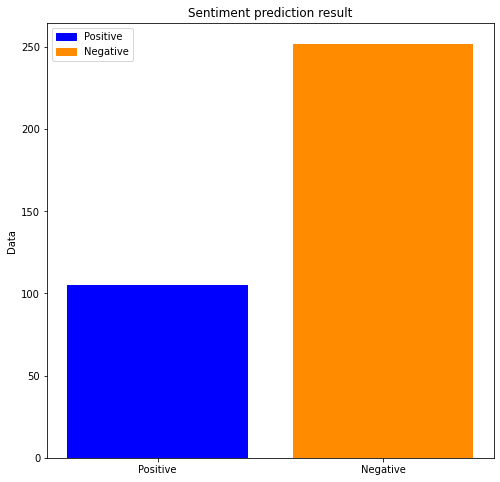

In [ ]:
#plotting the prediction result
import matplotlib.patches as mpatches
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data_cnb = [Positive,Negative]
labels = ['Positive','Negative']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Data')
plt.title('Sentiment prediction result')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Positive_bar = mpatches.Patch(color='blue', label='Positive')
Negative_bar = mpatches.Patch(color='darkorange', label='Negative')
plt.legend(handles=[Positive_bar, Negative_bar],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [ ]:
from google.colab import files
Result.to_csv('Final Prediksi Safa.csv') 
files.download('Final Prediksi Safa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>